In [116]:
import warnings
warnings.filterwarnings(action='ignore')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df=pd.read_csv("H1B_2020_to_2024.csv")

In [159]:
df.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL,EMPLOYER_POC_ADDRESS_1,EMPLOYER_POC_ADDRESS_2,H-1B_DEPENDENT
0,I-200-19268-393467,Certified,2019-09-25,2019-10-01,NaN,H-1B,"APPLICATION ENGINEER, OMS [15-1199.02]",15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I-200-19268-638983,Certified,2019-09-25,2019-10-01,NaN,H-1B,BI DEVELOPER II,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-200-19268-177184,Certified,2019-09-25,2019-10-01,NaN,H-1B,QUALITY ENGINEER,17-2141,MECHANICAL ENGINEERS,Y,...,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-200-19268-936403,Certified,2019-09-25,2019-10-01,NaN,H-1B,"SOFTWARE DEVELOPER, APPLICATIONS",15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-200-19268-394079,Certified,2019-09-25,2019-10-01,NaN,H-1B,QUALITY ENGINEER LEVEL II,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,NaN,Disclose Business,NaN,NaN,NaN,NaN,LEGAL@THEEGIANTS.COM,NaN,NaN,NaN


In [160]:
df.shape

(3151797, 99)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3151797 entries, 0 to 3151796
Data columns (total 99 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   CASE_NUMBER                     object 
 1   CASE_STATUS                     object 
 2   RECEIVED_DATE                   object 
 3   DECISION_DATE                   object 
 4   ORIGINAL_CERT_DATE              object 
 5   VISA_CLASS                      object 
 6   JOB_TITLE                       object 
 7   SOC_CODE                        object 
 8   SOC_TITLE                       object 
 9   FULL_TIME_POSITION              object 
 10  BEGIN_DATE                      object 
 11  END_DATE                        object 
 12  TOTAL_WORKER_POSITIONS          int64  
 13  NEW_EMPLOYMENT                  int64  
 14  CONTINUED_EMPLOYMENT            int64  
 15  CHANGE_PREVIOUS_EMPLOYMENT      int64  
 16  NEW_CONCURRENT_EMPLOYMENT       int64  
 17  CHANGE_EMPLOYER            

In [162]:
df.isnull().sum().sort_values(ascending=False)

APPENDIX_A_ATTACHED         3148350
PW_TRACKING_NUMBER          3145451
EMPLOYER_POC_PROVINCE       3137265
AGENT_ATTORNEY_PHONE_EXT    3001000
ORIGINAL_CERT_DATE          3000998
                             ...   
EMPLOYER_POSTAL_CODE              0
EMPLOYER_CITY                     0
EMPLOYER_ADDRESS1                 0
AMENDED_PETITION                  0
CASE_NUMBER                       0
Length: 99, dtype: int64

In [163]:
missing_values=df.isnull().sum().sort_values(ascending=False)
missing=missing_values[missing_values>0.3*df.shape[0]]

In [164]:
missing.index

Index(['APPENDIX_A_ATTACHED', 'PW_TRACKING_NUMBER', 'EMPLOYER_POC_PROVINCE',
       'AGENT_ATTORNEY_PHONE_EXT', 'ORIGINAL_CERT_DATE', 'PW_SURVEY_NAME',
       'PW_SURVEY_PUBLISHER', 'AGENT_ATTORNEY_PROVINCE',
       'EMPLOYER_POC_PHONE_EXT', 'EMPLOYER_PHONE_EXT', 'PW_OTHER_YEAR',
       'EMPLOYER_PROVINCE', 'PW_OTHER_SOURCE', 'EMPLOYER_POC_ADDRESS_2',
       'TRADE_NAME_DBA', 'H-1B_DEPENDENT', 'EMPLOYER_POC_ADDRESS_1',
       'EMPLOYER_POC_MIDDLE_NAME', 'PREPARER_MIDDLE_INITIAL',
       'SECONDARY_ENTITY_BUSINESS_NAME', 'STATUTORY_BASIS', 'SUPPORT_H1B',
       'WORKSITE_ADDRESS2', 'WAGE_RATE_OF_PAY_TO',
       'AGENT_ATTORNEY_MIDDLE_NAME', 'EMPLOYER_POC_ADDRESS2',
       'EMPLOYER_ADDRESS2', 'PREPARER_LAST_NAME', 'PREPARER_FIRST_NAME',
       'PREPARER_EMAIL', 'PREPARER_BUSINESS_NAME', 'AGENT_ATTORNEY_ADDRESS2'],
      dtype='object')

In [165]:
df=df.drop(columns=[col for col in missing.index],axis=1)

In [166]:
df.shape

(3151797, 67)

In [167]:
df=df.drop_duplicates()

In [168]:
df.shape

(2590760, 67)

In [169]:
df.describe()

,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,NAICS_CODE,AGENT_ATTORNEY_PHONE,WORKSITE_WORKERS,WAGE_RATE_OF_PAY_FROM,PREVAILING_WAGE,TOTAL_WORKSITE_LOCATIONS
count,2.590760e+06,2.590760e+06,2.590760e+06,2.590760e+06,2.590760e+06,2.590760e+06,2.590760e+06,2.590760e+06,1.875119e+06,2.577426e+06,2.590759e+06,2.588799e+06,2.577427e+06
mean,1.771742e+00,6.385539e-01,3.715736e-01,1.522769e-01,9.506091e-03,3.089854e-01,2.946606e-01,4.233109e+05,1.523748e+10,1.771761e+00,1.101260e+05,9.476193e+04,1.437631e+00
std,6.000516e+00,3.781748e+00,2.613725e+00,1.253414e+00,1.990012e-01,1.639933e+00,1.402227e+00,2.091853e+05,6.764347e+10,6.005694e+00,7.620023e+05,4.110806e+04,7.020744e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.710210e+05,1.032959e+09,1.000000e+00,7.250000e+00,7.250000e+00,1.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.342200e+05,1.303873e+10,1.000000e+00,8.000000e+04,7.400600e+04,1.000000e+00
50%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.415110e+05,1.469291e+10,1.000000e+00,1.020000e+05,9.355800e+04,1.000000e+00
75%,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.415120e+05,1.703678e+10,1.000000e+00,1.350000e+05,1.170830e+05,2.000000e+00
max,4.500000e+02,4.500000e+02,2.000000e+02,1.000000e+02,1.700000e+02,2.750000e+02,3.000000e+02,5.698555e+06,8.282103e+13,4.500000e+02,1.204781e+09,8.108500e+05,1.000000e+01


In [170]:
df.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,BEGIN_DATE,...,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PW_OES_YEAR,TOTAL_WORKSITE_LOCATIONS,AGREE_TO_LC_STATEMENT,H1B_DEPENDENT,WILLFUL_VIOLATOR,PUBLIC_DISCLOSURE
0,I-200-19268-393467,Certified,2019-09-25,2019-10-01,H-1B,"APPLICATION ENGINEER, OMS [15-1199.02]",15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,2019-10-07,...,Year,95118.0,Year,IV,2018.0,NaN,Y,N,N,Disclose Business
1,I-200-19268-638983,Certified,2019-09-25,2019-10-01,H-1B,BI DEVELOPER II,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,2020-01-08,...,Hour,39.0,Hour,II,2019.0,NaN,Y,Y,N,Disclose Business
2,I-200-19268-177184,Certified,2019-09-25,2019-10-01,H-1B,QUALITY ENGINEER,17-2141,MECHANICAL ENGINEERS,Y,2019-10-03,...,Hour,39.0,Hour,II,2019.0,NaN,Y,Y,N,Disclose Business
3,I-200-19268-936403,Certified,2019-09-25,2019-10-01,H-1B,"SOFTWARE DEVELOPER, APPLICATIONS",15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,2019-10-07,...,Hour,53.0,Hour,IV,2019.0,NaN,Y,Y,N,Disclose Business
4,I-200-19268-394079,Certified,2019-09-25,2019-10-01,H-1B,QUALITY ENGINEER LEVEL II,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,2019-10-09,...,Year,65333.0,Year,II,2019.0,NaN,Y,Y,N,Disclose Business


In [171]:
for col in df.columns:
    print(f"{col}:{df[col].value_counts()}")

CASE_NUMBER:CASE_NUMBER
I-200-20350-961993    4
I-200-20198-718859    4
I-200-20307-895124    4
I-200-20091-449298    4
I-200-20307-895215    4
                     ..
I-200-21139-327124    1
I-200-21139-325286    1
I-200-21140-328552    1
I-200-21139-325776    1
I-200-24176-143591    1
Name: count, Length: 2248860, dtype: int64
CASE_STATUS:CASE_STATUS
Certified                2409107
Certified - Withdrawn     118245
Withdrawn                  47502
Denied                     15906
Name: count, dtype: int64
RECEIVED_DATE:RECEIVED_DATE
2020-10-07    30648
2020-12-09    13954
2020-12-10     9118
2020-12-14     6596
2020-12-11     6421
              ...  
2023-06-18        1
2017-02-19        1
2023-07-29        1
2018-11-29        1
2018-12-19        1
Name: count, Length: 2549, dtype: int64
DECISION_DATE:DECISION_DATE
2020-10-15    29251
2020-12-16    13401
2020-12-17     9003
2020-11-25     8926
2021-02-22     6950
              ...  
2019-11-24        1
2019-11-28        1
2023-10-08 

<BarContainer object of 4 artists>

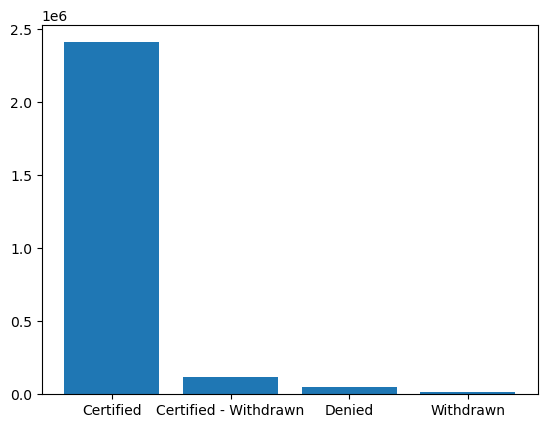

In [172]:
unique_case_status=df['CASE_STATUS'].unique()
unique_case_status_count=df['CASE_STATUS'].value_counts()
plt.bar(unique_case_status,unique_case_status_count)

In [173]:
for col in df.columns:
    print(col)

CASE_NUMBER
CASE_STATUS
RECEIVED_DATE
DECISION_DATE
VISA_CLASS
JOB_TITLE
SOC_CODE
SOC_TITLE
FULL_TIME_POSITION
BEGIN_DATE
END_DATE
TOTAL_WORKER_POSITIONS
NEW_EMPLOYMENT
CONTINUED_EMPLOYMENT
CHANGE_PREVIOUS_EMPLOYMENT
NEW_CONCURRENT_EMPLOYMENT
CHANGE_EMPLOYER
AMENDED_PETITION
EMPLOYER_NAME
EMPLOYER_ADDRESS1
EMPLOYER_CITY
EMPLOYER_STATE
EMPLOYER_POSTAL_CODE
EMPLOYER_COUNTRY
EMPLOYER_PHONE
NAICS_CODE
EMPLOYER_POC_LAST_NAME
EMPLOYER_POC_FIRST_NAME
EMPLOYER_POC_JOB_TITLE
EMPLOYER_POC_ADDRESS1
EMPLOYER_POC_CITY
EMPLOYER_POC_STATE
EMPLOYER_POC_POSTAL_CODE
EMPLOYER_POC_COUNTRY
EMPLOYER_POC_PHONE
EMPLOYER_POC_EMAIL
AGENT_REPRESENTING_EMPLOYER
AGENT_ATTORNEY_LAST_NAME
AGENT_ATTORNEY_FIRST_NAME
AGENT_ATTORNEY_ADDRESS1
AGENT_ATTORNEY_CITY
AGENT_ATTORNEY_STATE
AGENT_ATTORNEY_POSTAL_CODE
AGENT_ATTORNEY_COUNTRY
AGENT_ATTORNEY_PHONE
AGENT_ATTORNEY_EMAIL_ADDRESS
LAWFIRM_NAME_BUSINESS_NAME
STATE_OF_HIGHEST_COURT
NAME_OF_HIGHEST_STATE_COURT
WORKSITE_WORKERS
SECONDARY_ENTITY
WORKSITE_ADDRESS1
WORKSITE_CIT

In [174]:
df['EMPLOYER_COUNTRY'].value_counts()

EMPLOYER_COUNTRY
UNITED STATES OF AMERICA    2590488
GEORGIA                         160
AUSTRALIA                        37
CANADA                           29
INDIA                            14
UNITED KINGDOM                    6
UNITED ARAB EMIRATES              5
AFGHANISTAN                       4
ANGOLA                            3
SWEDEN                            2
ALBANIA                           2
BELGIUM                           1
ISRAEL                            1
CHINA                             1
MEXICO                            1
CAMBODIA                          1
BARBADOS                          1
CHILE                             1
BAHAMAS                           1
COLOMBIA                          1
NAMIBIA                           1
Name: count, dtype: int64

In [176]:
# drop_cols = [
#     'CASE_NUMBER',                  # Unique identifier
#     'EMPLOYER_ADDRESS1', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY',
#     'EMPLOYER_POC_LAST_NAME', 'EMPLOYER_POC_FIRST_NAME', 'EMPLOYER_POC_JOB_TITLE',
#     'EMPLOYER_POC_ADDRESS1', 'EMPLOYER_POC_CITY', 'EMPLOYER_POC_STATE',
#     'EMPLOYER_POC_POSTAL_CODE', 'EMPLOYER_POC_COUNTRY', 'EMPLOYER_POC_PHONE', 'EMPLOYER_POC_EMAIL',
#     'AGENT_ATTORNEY_LAST_NAME', 'AGENT_ATTORNEY_FIRST_NAME',
#     'AGENT_ATTORNEY_ADDRESS1', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE',
#     'AGENT_ATTORNEY_POSTAL_CODE', 'AGENT_ATTORNEY_COUNTRY', 'AGENT_ATTORNEY_PHONE',
#     'AGENT_ATTORNEY_EMAIL_ADDRESS',
#     'LAWFIRM_NAME_BUSINESS_NAME',
#     'STATE_OF_HIGHEST_COURT', 'NAME_OF_HIGHEST_STATE_COURT',
#     'AGENT_REPRESENTING_EMPLOYER',
#     'WORKSITE_ADDRESS1', 'WORKSITE_POSTAL_CODE',
#                  # Almost always missing
#     'SECONDARY_ENTITY',              # Rarely relevant or missing
# ]


In [177]:
df['PUBLIC_DISCLOSURE'].value_counts()

PUBLIC_DISCLOSURE
Disclose Business                   2504477
Disclose Employment                   48581
Disclose Business and Employment      37094
Name: count, dtype: int64

In [178]:
df['EMPLOYER_POC_CITY'].value_counts()

EMPLOYER_POC_CITY
New York           102931
College Station     66039
Seattle             57986
Mountain View       54607
San Francisco       53729
                    ...  
Hartsville              1
VERNON                  1
Armonk                  1
Jamaica                 1
VICTORIA                1
Name: count, Length: 14853, dtype: int64

In [179]:
df['RECEIVED_DATE']=pd.to_datetime(df['RECEIVED_DATE'])
df['DECISION_DATE']=pd.to_datetime(df['DECISION_DATE'])
df['BEGIN_DATE']=pd.to_datetime(df['BEGIN_DATE'])
df['END_DATE']=pd.to_datetime(df['END_DATE'])

In [180]:
for col in df.columns:
    print(f"{col} : {df[col].nunique()}")

CASE_NUMBER : 2248860
CASE_STATUS : 4
RECEIVED_DATE : 2549
DECISION_DATE : 1435
VISA_CLASS : 4
JOB_TITLE : 391552
SOC_CODE : 1486
SOC_TITLE : 1854
FULL_TIME_POSITION : 2
BEGIN_DATE : 2771
END_DATE : 3055
TOTAL_WORKER_POSITIONS : 73
NEW_EMPLOYMENT : 68
CONTINUED_EMPLOYMENT : 42
CHANGE_PREVIOUS_EMPLOYMENT : 27
NEW_CONCURRENT_EMPLOYMENT : 16
CHANGE_EMPLOYER : 30
AMENDED_PETITION : 26
EMPLOYER_NAME : 175003
EMPLOYER_ADDRESS1 : 158630
EMPLOYER_CITY : 14135
EMPLOYER_STATE : 56
EMPLOYER_POSTAL_CODE : 16625
EMPLOYER_COUNTRY : 21
EMPLOYER_PHONE : 153660
NAICS_CODE : 2183
EMPLOYER_POC_LAST_NAME : 85691
EMPLOYER_POC_FIRST_NAME : 45757
EMPLOYER_POC_JOB_TITLE : 54168
EMPLOYER_POC_ADDRESS1 : 155449
EMPLOYER_POC_CITY : 14853
EMPLOYER_POC_STATE : 58
EMPLOYER_POC_POSTAL_CODE : 16949
EMPLOYER_POC_COUNTRY : 57
EMPLOYER_POC_PHONE : 163916
EMPLOYER_POC_EMAIL : 184023
AGENT_REPRESENTING_EMPLOYER : 4
AGENT_ATTORNEY_LAST_NAME : 11973
AGENT_ATTORNEY_FIRST_NAME : 8482
AGENT_ATTORNEY_ADDRESS1 : 21879
AGENT_ATTOR

In [182]:
for col in df.columns:
    if df[col].nunique()<10:
        print(f"{col} : {df[col].value_counts()}")
        print("*"*100)

CASE_STATUS : CASE_STATUS
Certified                2409107
Certified - Withdrawn     118245
Withdrawn                  47502
Denied                     15906
Name: count, dtype: int64
****************************************************************************************************
VISA_CLASS : VISA_CLASS
H-1B               2525674
E-3 Australian       51204
H-1B1 Chile           7792
H-1B1 Singapore       6090
Name: count, dtype: int64
****************************************************************************************************
FULL_TIME_POSITION : FULL_TIME_POSITION
Y    2548337
N      42423
Name: count, dtype: int64
****************************************************************************************************
AGENT_REPRESENTING_EMPLOYER : AGENT_REPRESENTING_EMPLOYER
Yes    1469451
No      543975
Y       405668
N       171666
Name: count, dtype: int64
****************************************************************************************************
SECONDARY_ENTITY :

In [183]:
yn=['WILLFUL_VIOLATOR','H1B_DEPENDENT','SECONDARY_ENTITY','AGENT_REPRESENTING_EMPLOYER','AGREE_TO_LC_STATEMENT']
for col in yn:
    df[col]=df[col].map({'Yes':'Yes','Y':'Yes','No':'No','N':'No'})

In [184]:
for col in df.columns:
    if df[col].nunique()<10:
        print(f"{col} : {df[col].value_counts()}")
        print("*"*100)

CASE_STATUS : CASE_STATUS
Certified                2409107
Certified - Withdrawn     118245
Withdrawn                  47502
Denied                     15906
Name: count, dtype: int64
****************************************************************************************************
VISA_CLASS : VISA_CLASS
H-1B               2525674
E-3 Australian       51204
H-1B1 Chile           7792
H-1B1 Singapore       6090
Name: count, dtype: int64
****************************************************************************************************
FULL_TIME_POSITION : FULL_TIME_POSITION
Y    2548337
N      42423
Name: count, dtype: int64
****************************************************************************************************
AGENT_REPRESENTING_EMPLOYER : AGENT_REPRESENTING_EMPLOYER
Yes    1875119
No      715641
Name: count, dtype: int64
****************************************************************************************************
SECONDARY_ENTITY : SECONDARY_ENTITY
No     19284

In [185]:
columns_to_keep = [
    'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE', 'BEGIN_DATE', 'END_DATE',
    'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE', 'SOC_TITLE', 'FULL_TIME_POSITION',
    'TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
    'CHANGE_PREVIOUS_EMPLOYMENT', 'CHANGE_EMPLOYER', 'NEW_CONCURRENT_EMPLOYMENT',
    'AMENDED_PETITION', 'EMPLOYER_NAME', 'EMPLOYER_CITY', 'EMPLOYER_STATE',
    'EMPLOYER_COUNTRY', 'NAICS_CODE', 'WORKSITE_CITY', 'WORKSITE_STATE',
    'WAGE_RATE_OF_PAY_FROM', 'WAGE_UNIT_OF_PAY', 'PREVAILING_WAGE',
    'PW_UNIT_OF_PAY', 'PW_WAGE_LEVEL', 'H1B_DEPENDENT', 'WILLFUL_VIOLATOR',
    'AGREE_TO_LC_STATEMENT', 'TOTAL_WORKSITE_LOCATIONS'
]


In [186]:
df = df[columns_to_keep]

In [214]:
print(df.columns.tolist())


['CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE', 'BEGIN_DATE', 'END_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE', 'SOC_TITLE', 'FULL_TIME_POSITION', 'TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'CHANGE_EMPLOYER', 'NEW_CONCURRENT_EMPLOYMENT', 'AMENDED_PETITION', 'EMPLOYER_NAME', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_COUNTRY', 'NAICS_CODE', 'WORKSITE_CITY', 'WORKSITE_STATE', 'WAGE_RATE_OF_PAY_FROM', 'WAGE_UNIT_OF_PAY', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'PW_WAGE_LEVEL', 'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'AGREE_TO_LC_STATEMENT', 'TOTAL_WORKSITE_LOCATIONS']


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2590760 entries, 0 to 2590759
Data columns (total 33 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   CASE_STATUS                 object        
 1   RECEIVED_DATE               datetime64[ns]
 2   DECISION_DATE               datetime64[ns]
 3   BEGIN_DATE                  datetime64[ns]
 4   END_DATE                    datetime64[ns]
 5   VISA_CLASS                  object        
 6   JOB_TITLE                   object        
 7   SOC_CODE                    object        
 8   SOC_TITLE                   object        
 9   FULL_TIME_POSITION          object        
 10  TOTAL_WORKER_POSITIONS      int64         
 11  NEW_EMPLOYMENT              int64         
 12  CONTINUED_EMPLOYMENT        int64         
 13  CHANGE_PREVIOUS_EMPLOYMENT  int64         
 14  CHANGE_EMPLOYER             int64         
 15  NEW_CONCURRENT_EMPLOYMENT   int64         
 16  AMENDED_PETITION       

In [226]:
categorical_cols=[]
for col in df.columns:
    if df[col].dtype=='object':
        if col not in categorical_cols:
            categorical_cols.append(col)

In [228]:
numerical_cols=[]
for col in df.columns:
    if df[col].dtype in ['int64','float64']:
        if col not in numerical_cols:
            numerical_cols.append(col)

In [244]:
df.shape

(2590760, 33)

In [250]:
df.head()

,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,BEGIN_DATE,END_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WORKSITE_STATE,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,H1B_DEPENDENT,WILLFUL_VIOLATOR,AGREE_TO_LC_STATEMENT,TOTAL_WORKSITE_LOCATIONS
0,Certified,2019-09-25,2019-10-01,2019-10-07,2022-10-07,H-1B,"APPLICATION ENGINEER, OMS [15-1199.02]",15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,OH,100000.00,Year,95118.0,Year,IV,No,No,Yes,NaN
1,Certified,2019-09-25,2019-10-01,2020-01-08,2023-01-07,H-1B,BI DEVELOPER II,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,TN,38.57,Hour,39.0,Hour,II,Yes,No,Yes,NaN
2,Certified,2019-09-25,2019-10-01,2019-10-03,2022-10-02,H-1B,QUALITY ENGINEER,17-2141,MECHANICAL ENGINEERS,Y,...,MI,43.50,Hour,39.0,Hour,II,Yes,No,Yes,NaN
3,Certified,2019-09-25,2019-10-01,2019-10-07,2022-10-01,H-1B,"SOFTWARE DEVELOPER, APPLICATIONS",15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,MI,57.69,Hour,53.0,Hour,IV,Yes,No,Yes,NaN
4,Certified,2019-09-25,2019-10-01,2019-10-09,2022-10-08,H-1B,QUALITY ENGINEER LEVEL II,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,OH,75000.00,Year,65333.0,Year,II,Yes,No,Yes,NaN


In [264]:

categories = {
    "Engineering": [
        "engineer", "engineering", "designer", "asic", "mep", "mechanical", "electrical",
        "controls", "industrial", "civil", "validation", "qa", "manufacturing",
        "product design", "architect", "designer", "development", "systems engineer",
        "software engineer"
    ],
    "IT & Software": [
        "developer", "software", "programmer", "analyst", "system", "network", "cloud",
        "database", "application", "devops", "security", "data", "tech", "architect",
        "tester", "support", "backend", "frontend", "java", "python", "sap", "salesforce",
        "informatics", "informatica", "network", "infrastructure"
    ],
    "Healthcare": [
        "physician", "doctor", "resident", "nurse", "clinical", "hematologist", "oncologist",
        "pathologist", "psychiatrist", "hospitalist", "therapist", "audiologist",
        "veterinarian", "acupuncturist", "medical", "fellow", "clinician"
    ],
    "Research & Science": [
        "researcher", "research", "scientist", "postdoctoral", "bioinformatics",
        "molecular", "quantitative", "r&d", "analyst", "statistician", "data scientist"
    ],
    "Management": [
        "manager", "director", "vp", "head", "chief", "lead", "supervisor", "executive",
        "coordinator", "consultant", "officer", "administrator", "program manager",
        "project manager", "associate director"
    ],
    "Education": [
        "professor", "teacher", "instructor", "educator", "assistant professor",
        "montessori", "esl", "elementary", "high school", "college", "university"
    ],
    "Finance & Accounting": [
        "accountant", "auditor", "tax", "financial", "investment", "analyst", "finance",
        "reporting", "compensation", "risk", "audit", "accounting"
    ],
    "Marketing & Sales": [
        "marketing", "sales", "product marketing", "brand manager", "customer success",
        "business development", "strategist", "operations", "service delivery",
        "salesforce"
    ],
    "Legal": [
        "attorney", "patent", "legal", "compliance", "contracts", "lawyer"
    ],
}

def categorize_title(title):
    title_lower = str(title).lower()
    for category, keywords in categories.items():
        if any(keyword in title_lower for keyword in keywords):
            return category
    return "Other"

# Apply the function to the JOB_TITLE column to create a new 'CATEGORY' column
df['JOB_TITLE'] = df['JOB_TITLE'].apply(categorize_title)

# Optional: see distribution
print(df['JOB_TITLE'].value_counts())


JOB_TITLE
Engineering             1036079
IT & Software            823974
Management               295496
Other                    131246
Healthcare               115041
Research & Science        74959
Education                 64203
Finance & Accounting      35203
Marketing & Sales          9477
Legal                      5082
Name: count, dtype: int64


In [266]:
len(categorical_cols)

18

In [268]:
len(numerical_cols)

11

In [279]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].median())
    elif df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])


In [281]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of your data
encoded_df = df.copy()

# Encode all categorical columns temporarily
for col in categorical_cols:
    encoded_df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Correlation with target
correlations = encoded_df.corr()['CASE_STATUS'].sort_values(ascending=False)
print(correlations)


CASE_STATUS                   1.000000
SOC_CODE                      0.039397
EMPLOYER_NAME                 0.026632
JOB_TITLE                     0.015569
DECISION_DATE                 0.014766
NAICS_CODE                    0.011917
WILLFUL_VIOLATOR              0.009811
NEW_CONCURRENT_EMPLOYMENT     0.005350
WAGE_RATE_OF_PAY_FROM        -0.001444
WORKSITE_CITY                -0.003850
EMPLOYER_COUNTRY             -0.005674
CHANGE_EMPLOYER              -0.006255
NEW_EMPLOYMENT               -0.007132
CONTINUED_EMPLOYMENT         -0.008068
TOTAL_WORKSITE_LOCATIONS     -0.009033
VISA_CLASS                   -0.009269
WORKSITE_STATE               -0.009518
EMPLOYER_STATE               -0.010374
SOC_TITLE                    -0.010809
CHANGE_PREVIOUS_EMPLOYMENT   -0.013419
EMPLOYER_CITY                -0.016451
TOTAL_WORKER_POSITIONS       -0.017399
FULL_TIME_POSITION           -0.018103
AMENDED_PETITION             -0.019169
H1B_DEPENDENT                -0.023946
PW_WAGE_LEVEL            

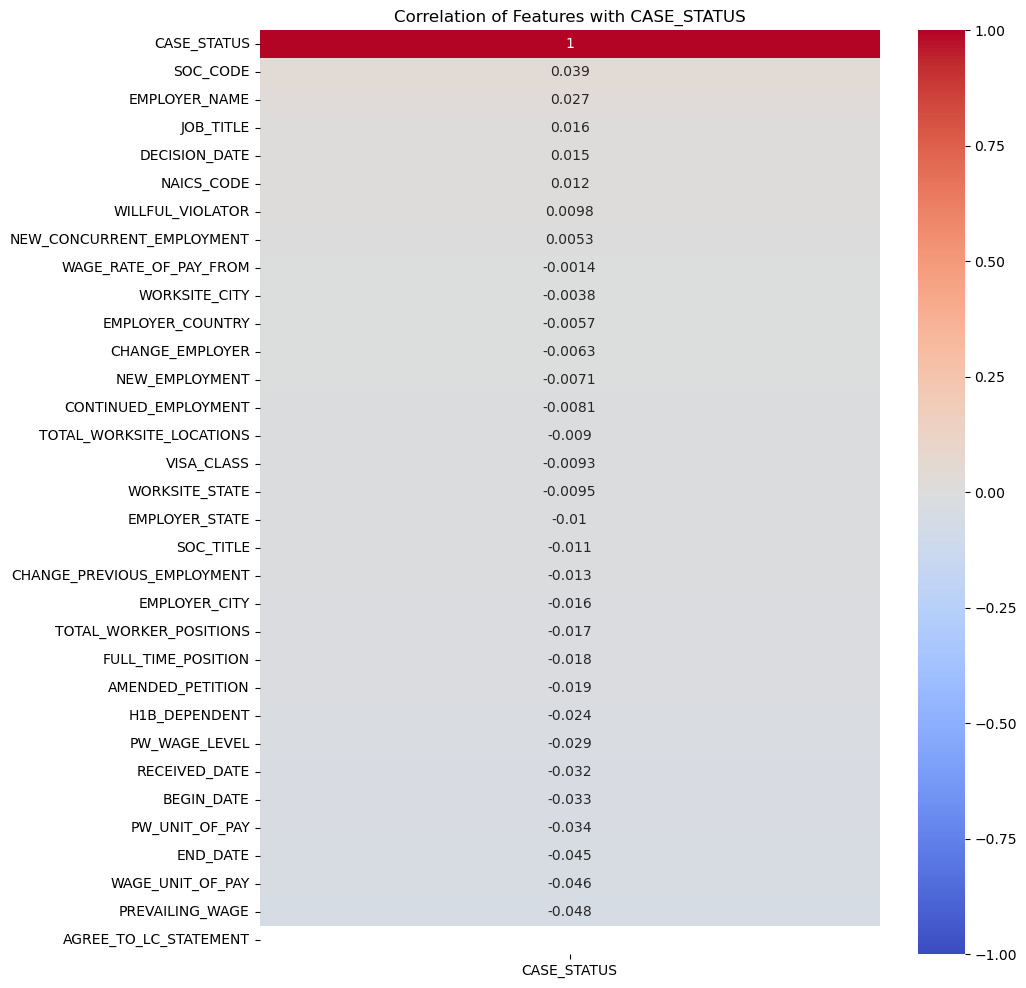

In [282]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Make a copy of your DataFrame
encoded_df = df.copy()

# Encode all categorical columns temporarily
for col in categorical_cols:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col].astype(str))

# Compute correlation matrix
corr_matrix = encoded_df.corr()

# Focus on the target column
target_corr = corr_matrix[['CASE_STATUS']].sort_values(by='CASE_STATUS', ascending=False)

# Plot heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with CASE_STATUS')
plt.show()


<Axes: >

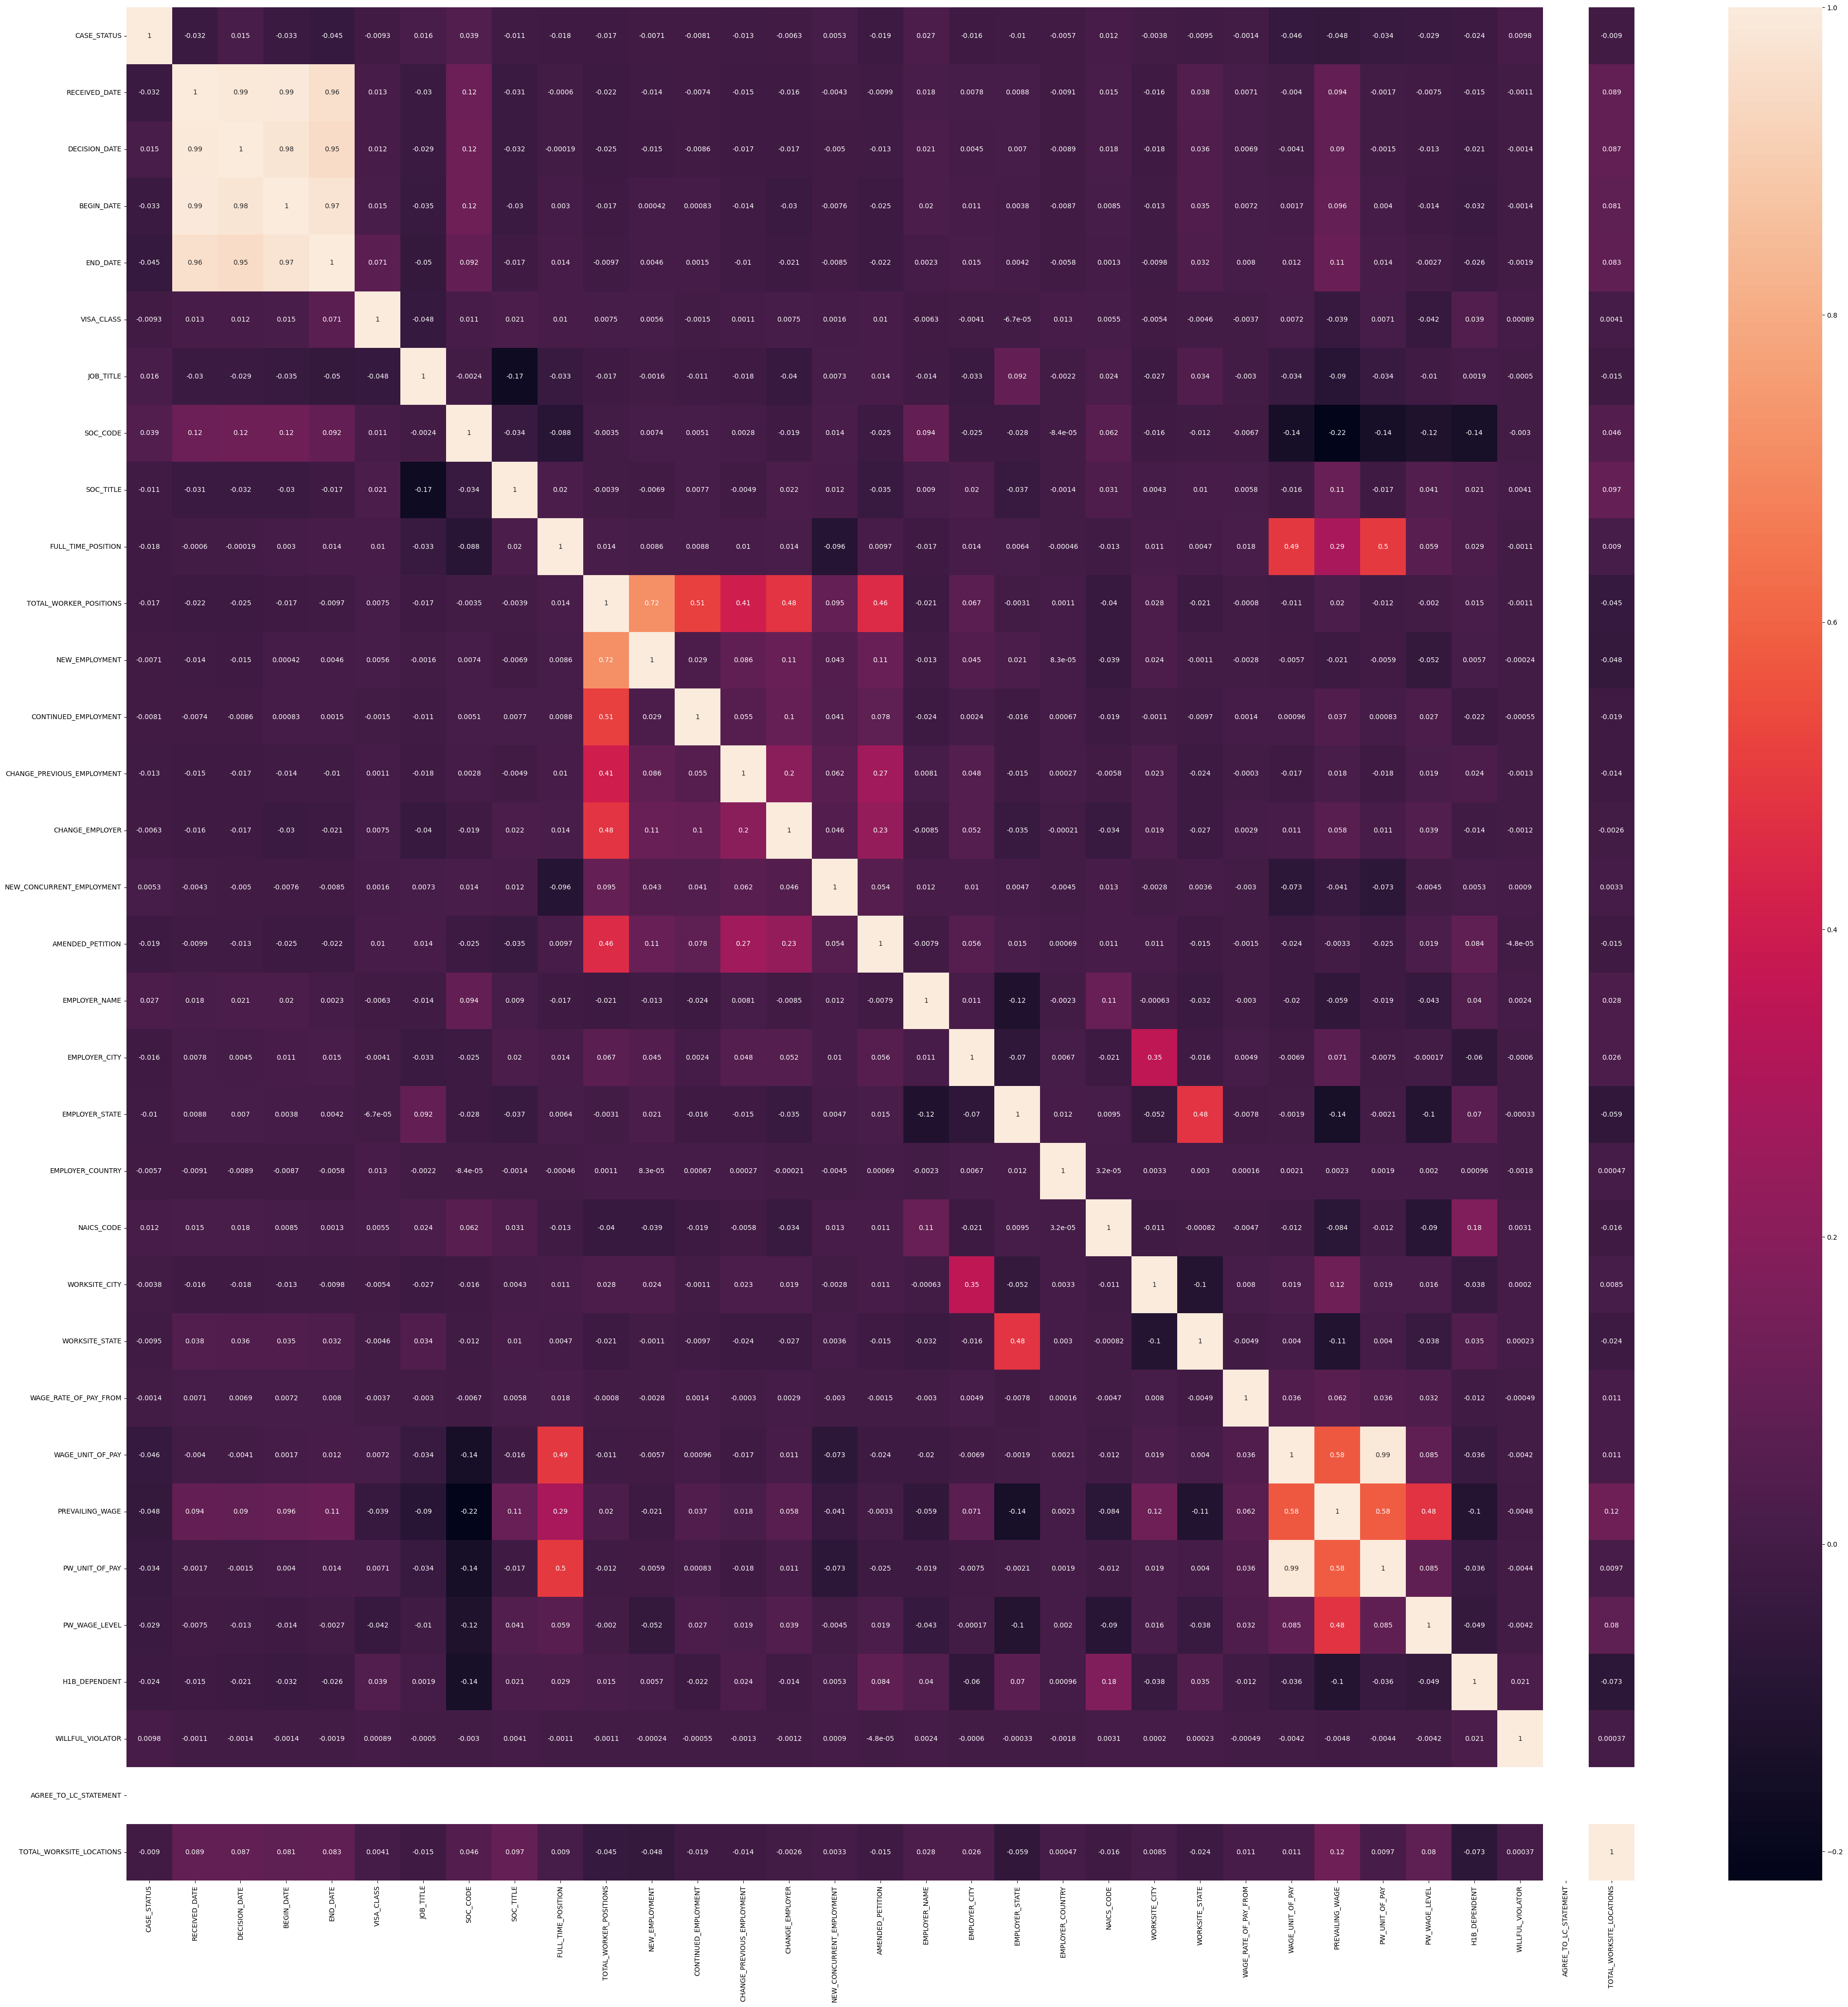

In [283]:
plt.figure(figsize=(50, 50))
sns.heatmap(encoded_df.corr(),annot=True)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2590760 entries, 0 to 2590759
Data columns (total 33 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   CASE_STATUS                 object        
 1   RECEIVED_DATE               datetime64[ns]
 2   DECISION_DATE               datetime64[ns]
 3   BEGIN_DATE                  datetime64[ns]
 4   END_DATE                    datetime64[ns]
 5   VISA_CLASS                  object        
 6   JOB_TITLE                   object        
 7   SOC_CODE                    object        
 8   SOC_TITLE                   object        
 9   FULL_TIME_POSITION          object        
 10  TOTAL_WORKER_POSITIONS      int64         
 11  NEW_EMPLOYMENT              int64         
 12  CONTINUED_EMPLOYMENT        int64         
 13  CHANGE_PREVIOUS_EMPLOYMENT  int64         
 14  CHANGE_EMPLOYER             int64         
 15  NEW_CONCURRENT_EMPLOYMENT   int64         
 16  AMENDED_PETITION       

In [289]:
df.isnull().sum()

CASE_STATUS                   0
RECEIVED_DATE                 0
DECISION_DATE                 0
BEGIN_DATE                    0
END_DATE                      0
VISA_CLASS                    0
JOB_TITLE                     0
SOC_CODE                      0
SOC_TITLE                     0
FULL_TIME_POSITION            0
TOTAL_WORKER_POSITIONS        0
NEW_EMPLOYMENT                0
CONTINUED_EMPLOYMENT          0
CHANGE_PREVIOUS_EMPLOYMENT    0
CHANGE_EMPLOYER               0
NEW_CONCURRENT_EMPLOYMENT     0
AMENDED_PETITION              0
EMPLOYER_NAME                 0
EMPLOYER_CITY                 0
EMPLOYER_STATE                0
EMPLOYER_COUNTRY              0
NAICS_CODE                    0
WORKSITE_CITY                 0
WORKSITE_STATE                0
WAGE_RATE_OF_PAY_FROM         0
WAGE_UNIT_OF_PAY              0
PREVAILING_WAGE               0
PW_UNIT_OF_PAY                0
PW_WAGE_LEVEL                 0
H1B_DEPENDENT                 0
WILLFUL_VIOLATOR              0
AGREE_TO

In [291]:
df.to_csv('h1b_cleaned_data.csv', index=False)
